/tmp/ipython-input-675484091.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-675484091.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

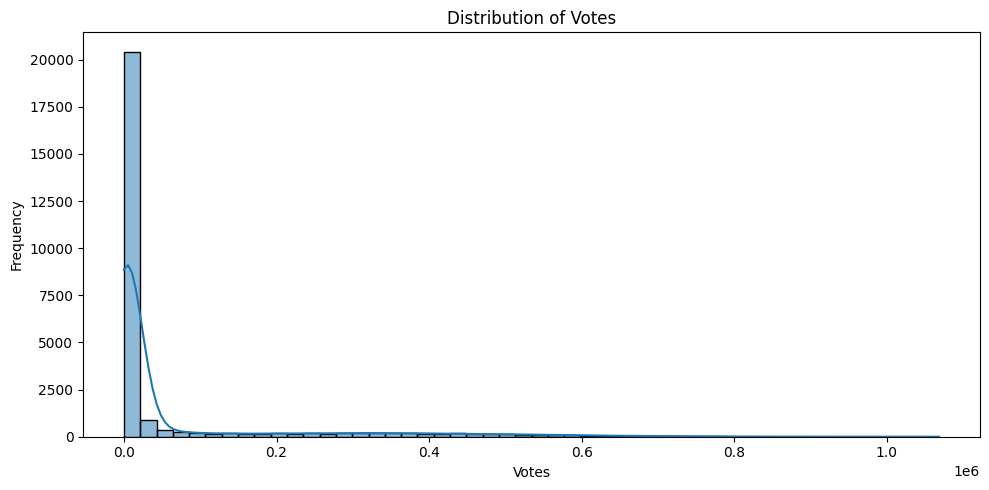

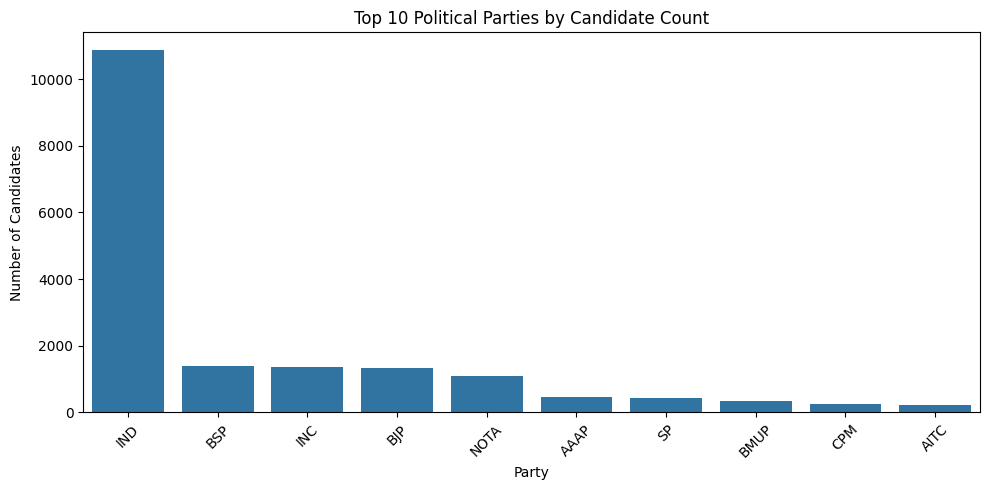

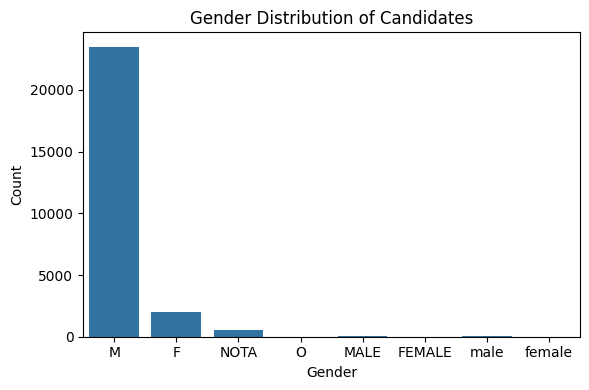

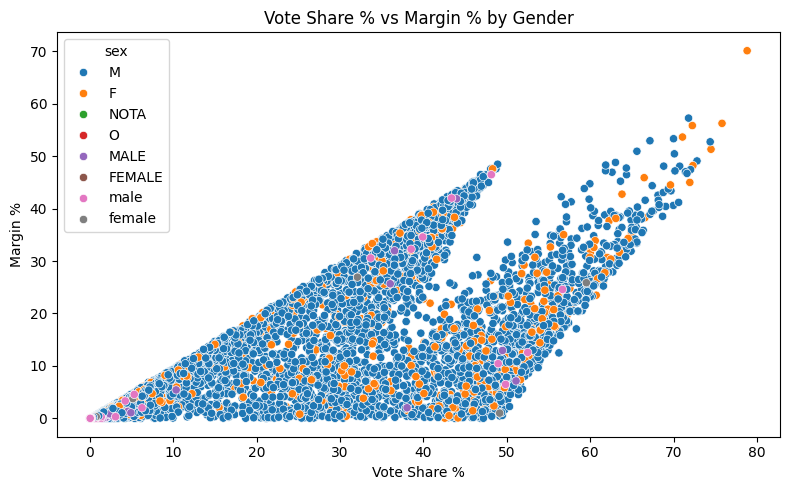

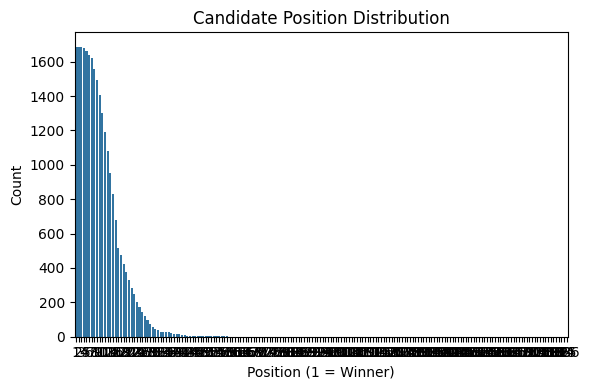

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("loksabha-general-elections.csv")

# Fill missing values
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Save cleaned file
df.to_csv("cleaned_loksabha_elections.csv", index=False)

# ---- EDA ----

# 1. Votes distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['votes'], bins=50, kde=True)
plt.title("Distribution of Votes")
plt.xlabel("Votes")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Top 10 political parties by number of candidates
top_parties = df['party'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_parties.index, y=top_parties.values)
plt.title("Top 10 Political Parties by Candidate Count")
plt.xlabel("Party")
plt.ylabel("Number of Candidates")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df)
plt.title("Gender Distribution of Candidates")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 4. Vote Share vs Margin %
plt.figure(figsize=(8, 5))
sns.scatterplot(x='vote_share_percentage', y='margin_percentage', hue='sex', data=df)
plt.title("Vote Share % vs Margin % by Gender")
plt.xlabel("Vote Share %")
plt.ylabel("Margin %")
plt.tight_layout()
plt.show()

# 5. Winners vs Non-winners
plt.figure(figsize=(6, 4))
sns.countplot(x='position', data=df)
plt.title("Candidate Position Distribution")
plt.xlabel("Position (1 = Winner)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
